In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/srenna/schulich_data_science/main/practise/country_vaccinations.csv')
data.describe(include='all')


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,86512,86512,86512,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000,86512,86512,86512
unique,223,223,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,81,119
top,Norway,NOR,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,482,482,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7608,26822,25951
mean,NaN,NaN,NaN,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157,NaN,NaN,NaN
std,NaN,NaN,NaN,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
data.drop(['iso_code', 'daily_vaccinations_raw'], axis=1)
print(data.isnull().mean())

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.495943
people_vaccinated                      0.522679
people_fully_vaccinated                0.551484
daily_vaccinations_raw                 0.591247
daily_vaccinations                     0.003456
total_vaccinations_per_hundred         0.495943
people_vaccinated_per_hundred          0.522679
people_fully_vaccinated_per_hundred    0.551484
daily_vaccinations_per_million         0.003456
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64


In [6]:
data_sorted = data.sort_values(by=['country', 'date'])
print(data_sorted)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2           

In [11]:
tips = sns.load_dataset('tips')
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
tips['percentage'] = tips['tip'] / tips['total_bill']
print(tips.head(10))


   total_bill   tip     sex smoker  day    time  size  percentage
0       16.99  1.01  Female     No  Sun  Dinner     2    0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3    0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3    0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2    0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4    0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4    0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2    0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4    0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2    0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2    0.218539


In [25]:
female = tips[tips['sex']== 'Female']['percentage']
print(female.info())

<class 'pandas.core.series.Series'>
Int64Index: 87 entries, 0 to 243
Series name: percentage
Non-Null Count  Dtype  
--------------  -----  
87 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB
None


In [26]:
male = tips[tips['sex']== 'Male']['percentage']
print(male.info())

<class 'pandas.core.series.Series'>
Int64Index: 157 entries, 1 to 242
Series name: percentage
Non-Null Count  Dtype  
--------------  -----  
157 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None


In [27]:
t_stat, p_val = stats.ttest_ind(female, male)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 1.0833972270477996
P-value: 0.27971038496054884


This suggests that if the null hypothesis is true (no significant difference between the sample mean and the population mean).

In [35]:
print(female.mean(), male.mean())

0.16649073632892478 0.15765054700429743


NameError: name 'plt' is not defined

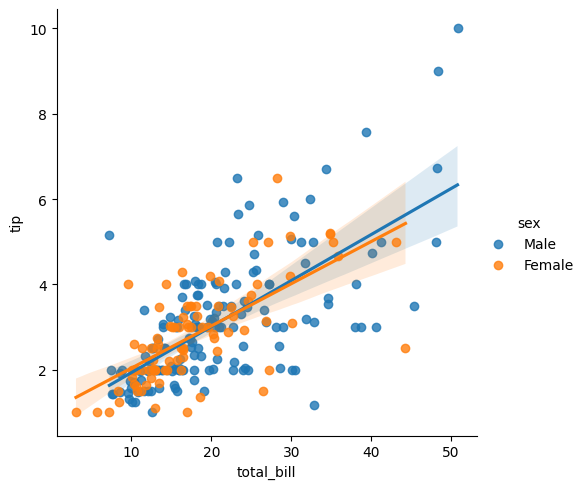

In [47]:
sns.lmplot(data = tips, x='total_bill', y='tip', hue = 'sex')
plt.show()

In [49]:
smoker = tips[tips['smoker']== 'Yes']['percentage']
nonsmoke = tips[tips['smoker']== 'No']['percentage']

t_stat, p_val = stats.ttest_ind(smoker, nonsmoke)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.4796693002669869
P-value: 0.6318957776878522


NameError: name 'plt' is not defined

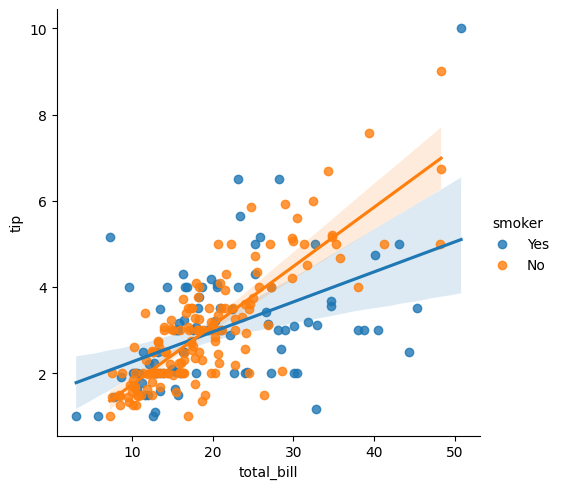

In [50]:
sns.lmplot(data = tips, x='total_bill', y='tip', hue = 'smoker')
plt.show()